## Lab | Random variable distributions

- Get the numerical variables from our dataset.
- Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
- Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import boxcox
import numpy as np

In [13]:
# Get the numerical variables from our dataset.

data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [14]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [15]:
numerical=data._get_numeric_data()

In [16]:
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


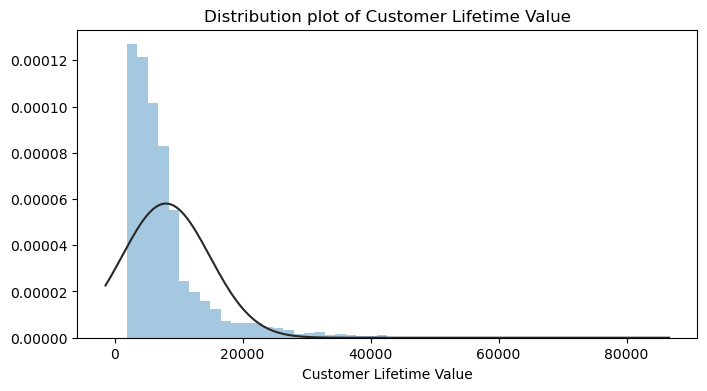

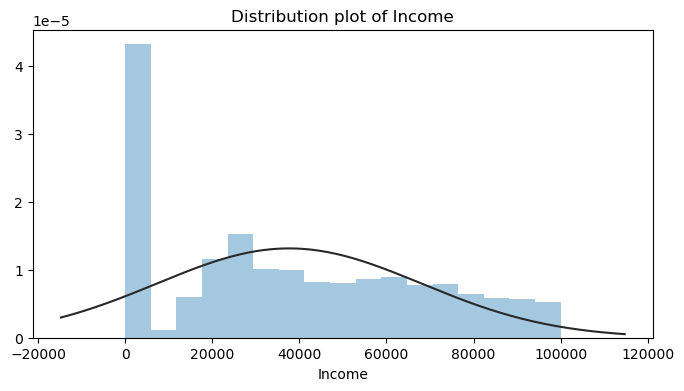

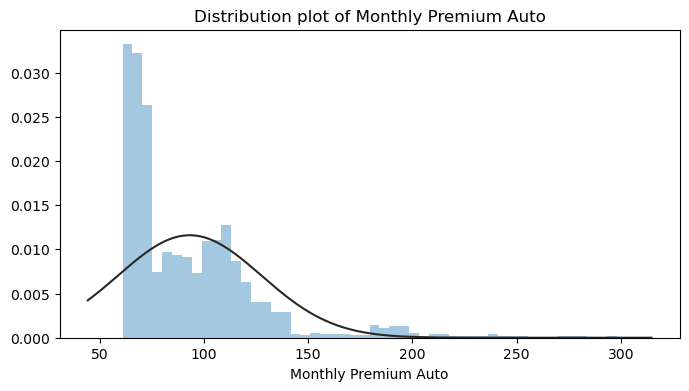

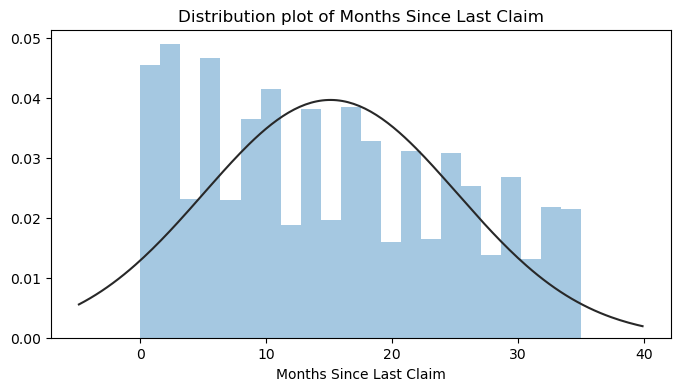

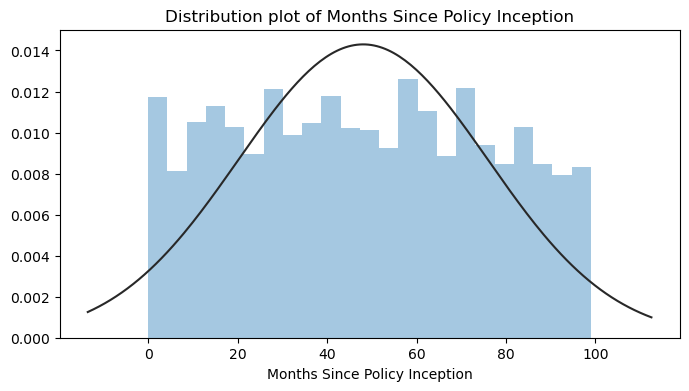

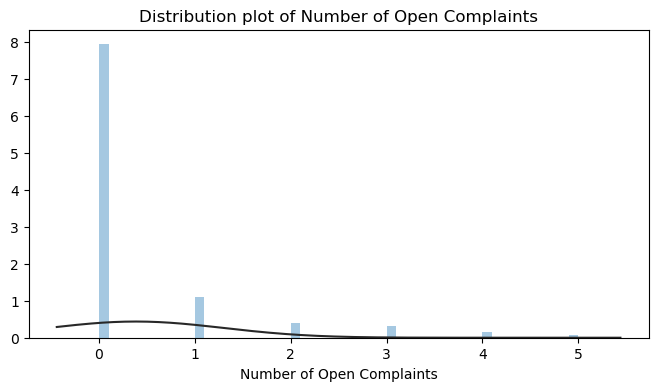

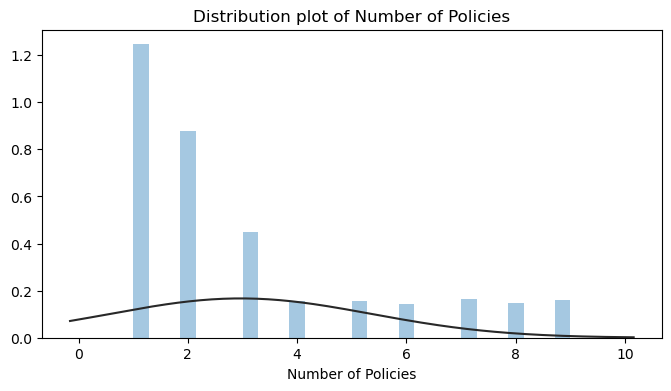

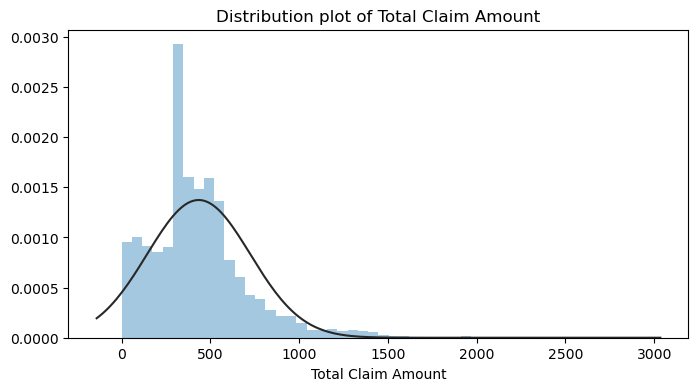

In [30]:
# Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

for column in numerical.columns:
    plt.figure(figsize=(8,4))
    sns.distplot(numerical[column], kde= False, fit=norm)
    plt.title('Distribution plot of {}'.format(column))
    plt.show()

Total claim amount: normal distributed
Number of policies, number of open complaints, monthly premium auto, customer lifetime vañlue: exponential distributed 
Months since policy inceptions, month soince last claim, income:neither

In [ ]:
#Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result

In [34]:
boxcox_data= pd.DataFrame()

In [37]:
for column in numerical.columns:
    transformed_data,_= boxcox(numerical[column]+1)
    boxcox_data[column] =transformed_data

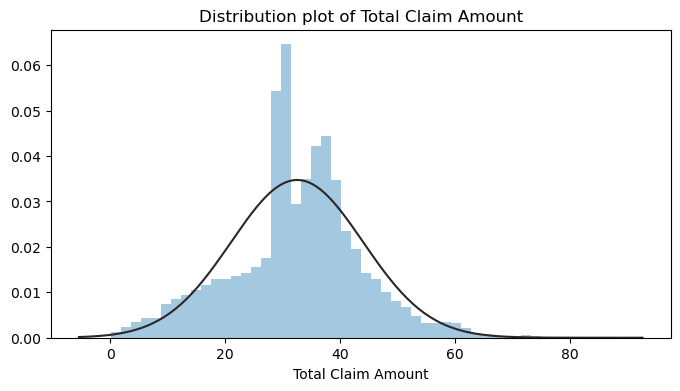

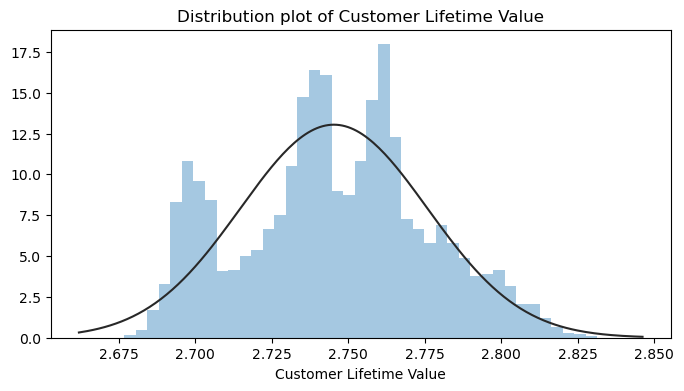

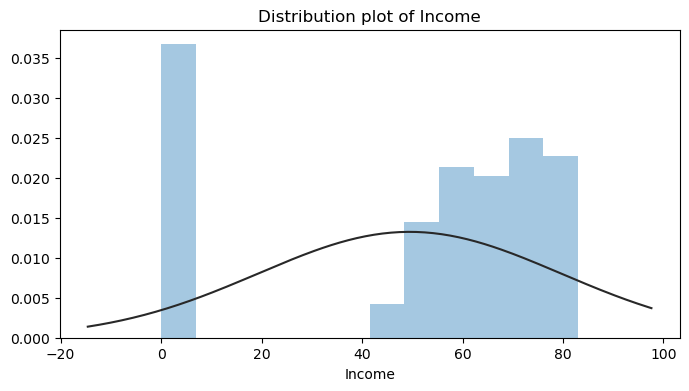

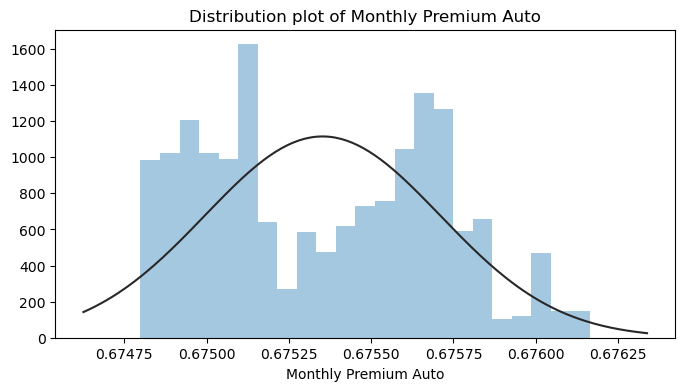

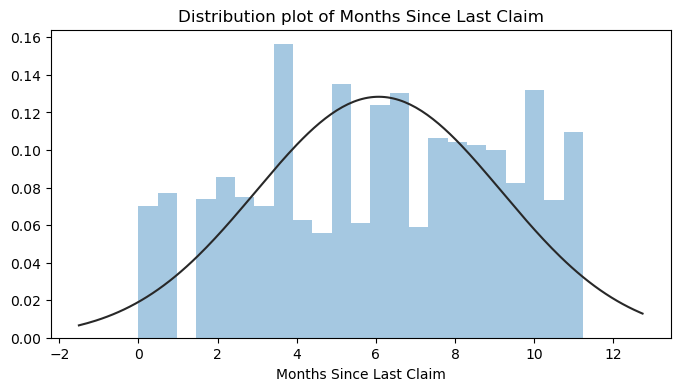

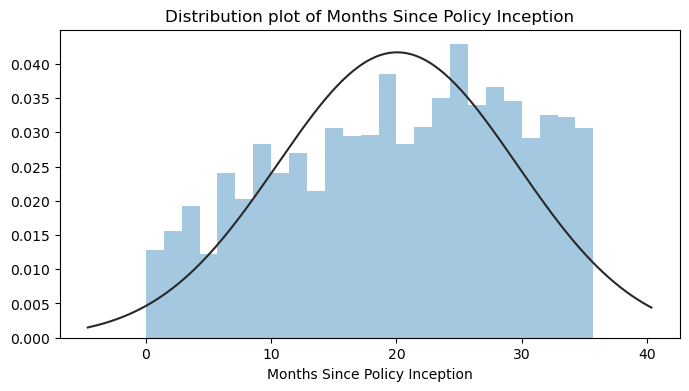

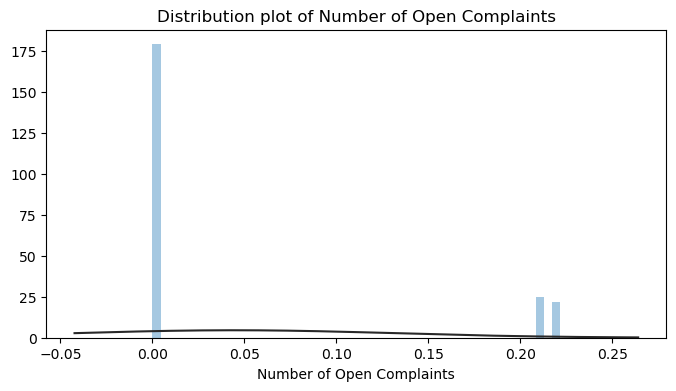

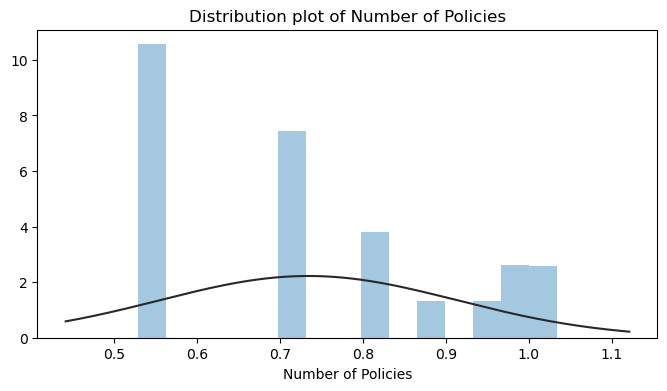

In [39]:
for column in boxcox_data.columns:
    plt.figure(figsize=(8,4))
    sns.distplot(boxcox_data[column], kde= False, fit=norm)
    plt.title('Distribution plot of {}'.format(column))
    plt.show()

In [40]:
log_data= pd.DataFrame()

In [41]:
log_data=numerical.apply(lambda x: np.log(x+1))

#def log_transform(x):
#return np.log(x + 1)

# Supongamos que tienes un DataFrame llamado 'numerical' que contiene los datos originales
#log_data = numerical.apply(log_transform)

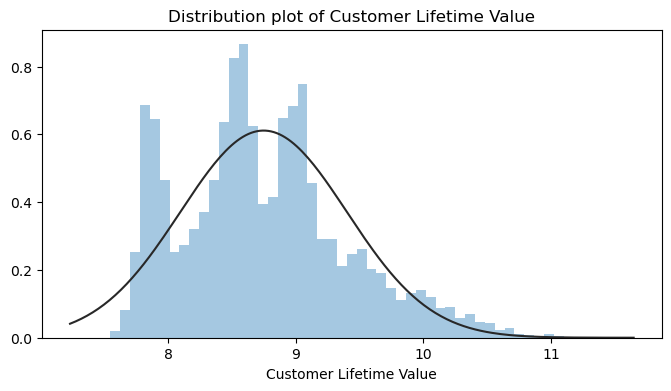

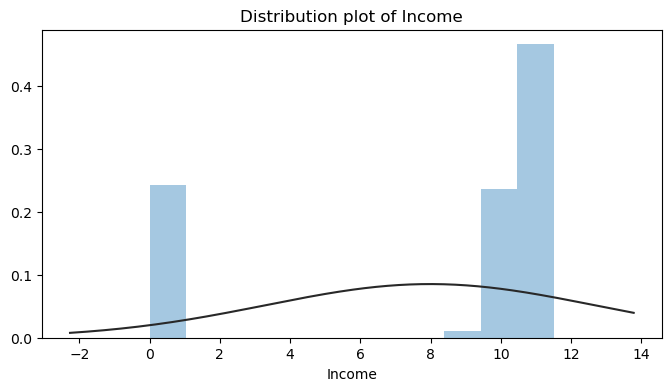

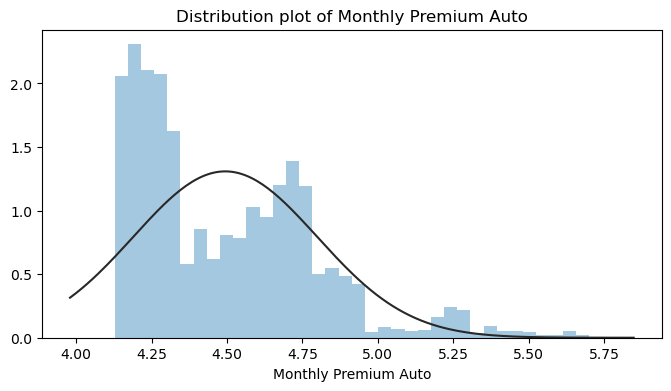

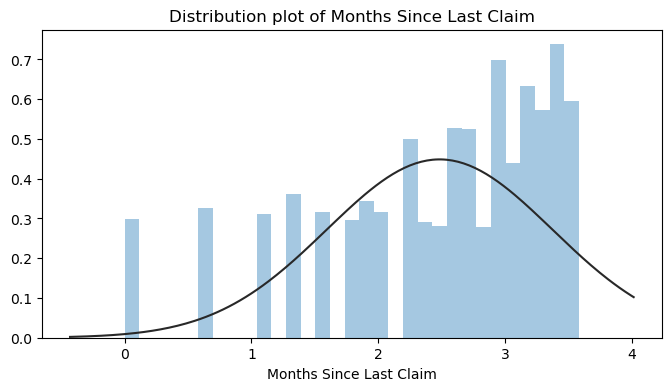

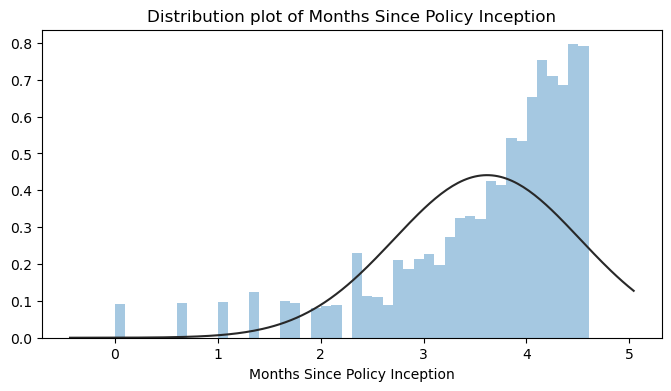

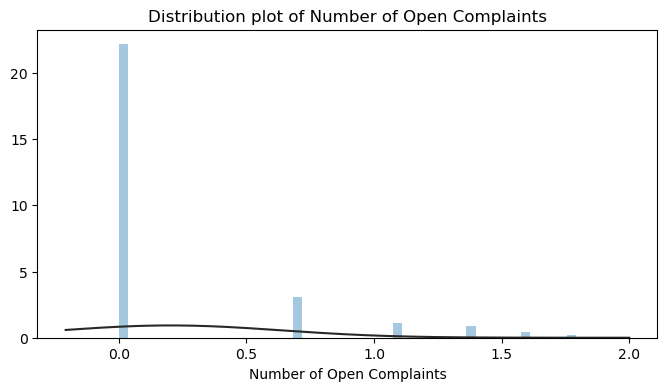

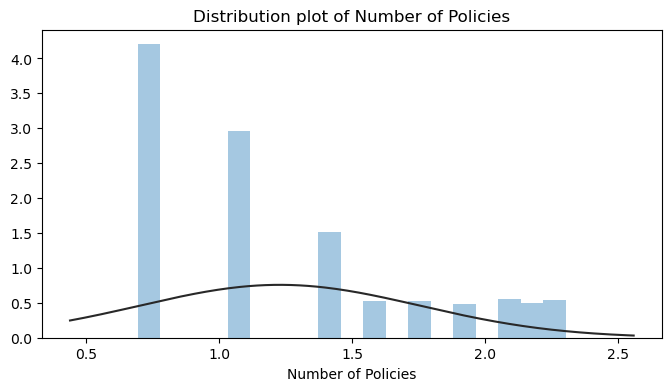

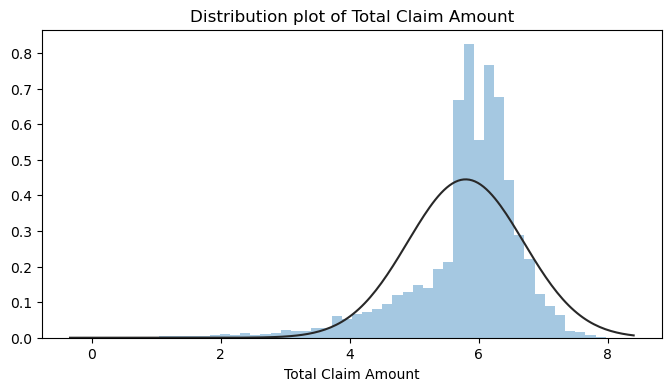

In [42]:
for column in log_data.columns:
    plt.figure(figsize=(8,4))
    sns.distplot(log_data[column], kde= False, fit=norm)
    plt.title('Distribution plot of {}'.format(column))
    plt.show()